# Homework 7 (DL Friday, November 10 at 12:00 PM)
#### ELEC-E8740 - Basics of sensor fusion - Autumn 2023

In [50]:
import numpy as np
import matplotlib.pyplot as plt

## Question: Consider the noise-free 2D robot dynamics equations

\begin{align}
\dot{p}^x(t) &= v(t) \cos( \phi(t)), \\
\dot{p}^y(t) &= v(t) sin(\phi(t)), \\
\dot{\phi}(t) &= \omega_{gyro}(t),
\end{align}



## where $p^x$, $p^y$ is the position, $\phi$ is the orientation angle, $v$ is the speed input, and $\omega_{gyro}$ is the gyroscope reading.

### Part a (1 point): Assume that the robot starts at time $t = 0$ from origin, heading upwards, that is, towards the positive y values. What should be the initial conditions, $p^x(0), p^y(0), \phi(0)$, corresponding to this? 

In the section below, code your answer. The output of the 'initial_condition()' function is 'px_0, py_0, phi_0'. Please do not change the order of the output.  

In [51]:
def initial_conditions():
    # Provide your answer as
    # px_0 = ...
    # py_0 = ...
    # phi_0 = ...
    px_0 = 0.0
    py_0 = 0.0
    phi_0 = np.pi/2    
    # raise NotImplementedError()
    return np.array([px_0, py_0, phi_0])  # do not change this line

### Part b (2 points): Construct speed and gyroscope signals which correspond to the following movement:

• The speed is constant $v(t) = 2$ for the time interval $t \in [0, 10]$ and
zero otherwise.

• The orientation of the robot is upwards (and thus it moves up) in
all time moments except during $t \in [3, 7)$ when it does a $360$-degree
turn clockwise.

#### In the section below, code your answer. The output of the 'inputs_u(t_0, t_end, N)' function is 'u' with two columns. The first column corresponds to the speed, $v$. The second column corresponds to the angular velocity of the robot, $\omega$.

#### Hint: pay attention to the definition of angular velocity.


In [52]:
def inputs_u(t_0, t_end, N):
    """ 
    Implement the inputs: speed and angular velocity of the robot
    -------
    Input:
        t_0: starting time
        t_end: ending time
        N: number of step
    Output:
        u: inputs
        
    """
    # time horizon
    t = np.linspace(t_0, t_end, N)
    
    # inputs u vector
    u = np.zeros((len(t), 2)) # v and omega
    
    ## u has two columns.
    ## The first column corresponds to v.
    ## The second column corresponds to omega.
    
    u[:, 0] = 2.0
    omega_turn = 2 * np.pi / (7 - 3)  
    mask_turn = (t >= 3) & (t < 7)
    u[mask_turn, 1] = -omega_turn 
    # raise NotImplementedError()
    return u   # do not change this line
    

#### To observe the behaviour of inputs, you could uncomment and run the given code below.

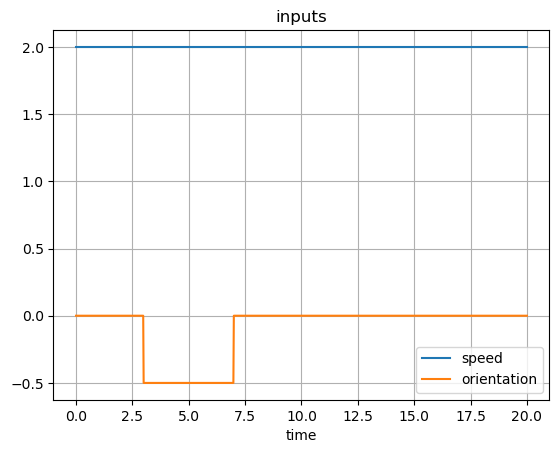

In [53]:
t_range = np.linspace(0, 20, 1001)
plt.plot(t_range, inputs_u(0, 20, 1001)[:, 0], label= 'speed')
plt.plot(t_range, inputs_u(0, 20, 1001)[:, 1] / np.pi, label = 'orientation')
plt.title('inputs')
plt.xlabel('time')
plt.legend()
plt.grid()

### Part c: Numerically, using Euler method, solve the differential equations with the inputs that you constructed above. Visualize the solution and check that it is what you expected.

### To use Euler method, you need to first construct the dynamic model which is given as follows.

In [54]:
def dynamic_model(t, xt, ut):
    """ 
    Dynamic model
    -------
    Input:
        t: time
        xt: position and orientation of the robot at time t: [px(t), py(t), phi(t)].
        ut: inputs of the robot at time t: [v(t), omega(t)]
    Output:
           an array of three elements that corresponds to the dynamic model, its shape is (3,). 
        
    """
    return np.array([
        ut[0] * np.cos(xt[2]), # v(t) * cos(phi(t))
        ut[0] * np.sin(xt[2]), # v(t) * sin(phi(t))
        ut[1]                  # w_gyro(t)
    ]) 
    
    
    

#### (1 point): Complete the 'Euler_solution' function in the next cell:

In [55]:
def Euler_solution(x0, t_0, t_end, N, inputs, func):
   
    T = np.linspace(t_0, t_end, N) 
    dt = (t_end - t_0) / (N - 1)
    
    x_euler = np.zeros((T.shape[0], 3))
    x_euler[0, :] = x0
    
    u = inputs(t_0, t_end, N)
    
    for i in range(0, T.shape[0] - 1):
        # implement euler method
        x_euler[i + 1, :] = x_euler[i, :] + dt * func(T[i], x_euler[i, :], u[i, :])        
        # raise NotImplementedError()
    return x_euler

In [56]:
x0 = initial_conditions()
t_0 =0
t_f = 10
N = 1001
xt = Euler_solution(x0, t_0, t_f, N, inputs_u, dynamic_model)

#### To observe the movement of the robot, you could uncomment and run the given code below.

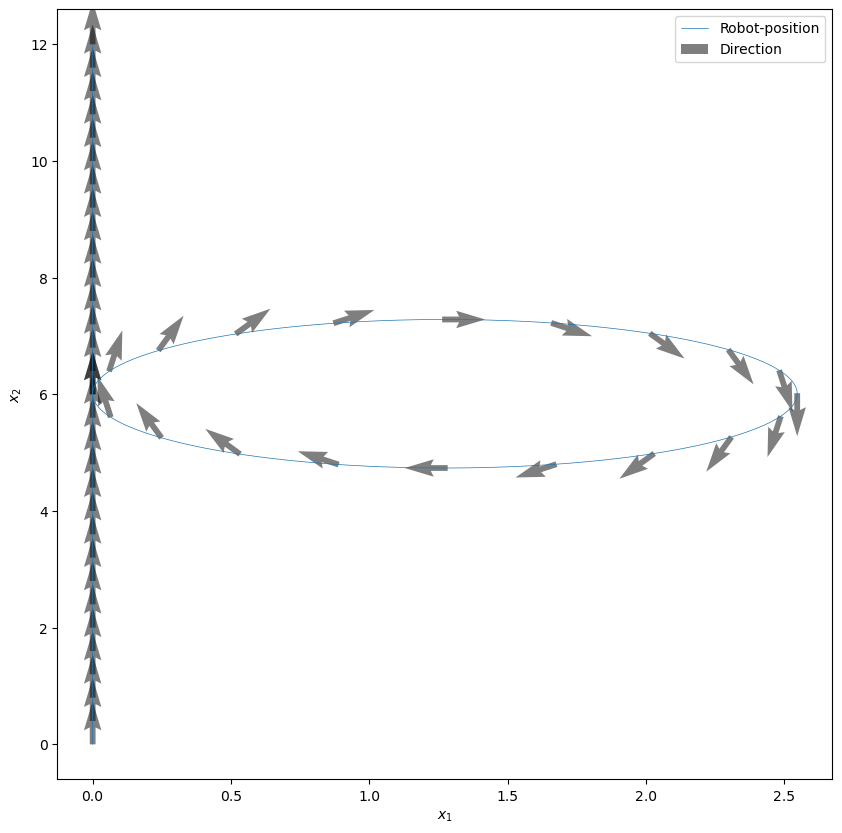

In [57]:
skip = 20
f, ax = plt.subplots(1, 1, figsize=(10,10))

ax.plot(xt[:,0], xt[:,1], label='Robot-position', linewidth=0.5)
ax.quiver(xt[::skip,0], xt[::skip,1],
               np.cos(xt[::skip,2]), np.sin(xt[::skip,2]),
               label='Direction', linewidth=0.5, alpha=0.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

ax.legend();

#### Expected movement of the robot which you should also see in the previous figure is as follows:

#### The initial location of the robot is at the origin (0,0), with its orientation facing upwards. It proceeds to move in this direction for a duration of 3 seconds, followed by a 360-degree turn completed over a span of 4 seconds. Finally, it continues going upward until it stops.

#### If you coded correctly, the following code should run without error.

In [58]:
assert np.allclose(xt[-1,0], 0.0)
assert np.allclose(xt[-1,2] / np.pi, -1.5, rtol=1e-03, atol=1e-04)

